In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("Airline Dataset.csv")
df.head()

Passenger ID First Name Last Name  Gender  Age Nationality  \
0         10856     Edithe    Leggis  Female   62       Japan   
1         43872     Elwood      Catt    Male   62   Nicaragua   
2         42633      Darby   Felgate    Male   67      Russia   
3         78493   Dominica      Pyle  Female   71       China   
4         82072        Bay   Pencost    Male   21       China   

                Airport Name Airport Country Code   Country Name  \
0           Coldfoot Airport                   US  United States   
1          Kugluktuk Airport                   CA         Canada   
2     Grenoble-Isère Airport                   FR         France   
3  Ottawa / Gatineau Airport                   CA         Canada   
4            Gillespie Field                   US  United States   

  Airport Continent     Continents Departure Date Arrival Airport  \
0               NAM  North America      6/28/2022             CXF   
1               NAM  North America     12/26/2022             YCO   
2                EU         Europe      1/18/2022             GNB   
3               NAM  North America      9/16/2022             YND   
4               NAM  North America      2/25/2022             SEE   

      Pilot Name Flight Status  
0  Edithe Leggis       On Time  
1    Elwood Catt       On Time  
2  Darby Felgate       On Time  
3  Dominica Pyle       Delayed  
4    Bay Pencost       On Time

In [3]:
df.isnull().sum()

Passenger ID            0
First Name              0
Last Name               0
Gender                  0
Age                     0
Nationality             0
Airport Name            0
Airport Country Code    0
Country Name            0
Airport Continent       0
Continents              0
Departure Date          0
Arrival Airport         0
Pilot Name              0
Flight Status           0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Passenger ID          98619 non-null  int64 
 1   First Name            98619 non-null  object
 2   Last Name             98619 non-null  object
 3   Gender                98619 non-null  object
 4   Age                   98619 non-null  int64 
 5   Nationality           98619 non-null  object
 6   Airport Name          98619 non-null  object
 7   Airport Country Code  98619 non-null  object
 8   Country Name          98619 non-null  object
 9   Airport Continent     98619 non-null  object
 10  Continents            98619 non-null  object
 11  Departure Date        98619 non-null  object
 12  Arrival Airport       98619 non-null  object
 13  Pilot Name            98619 non-null  object
 14  Flight Status         98619 non-null  object
dtypes: int64(2), object(13)
memory usage

In [5]:
df['Departure Date'] = pd.to_datetime(df['Departure Date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Passenger ID          98619 non-null  int64         
 1   First Name            98619 non-null  object        
 2   Last Name             98619 non-null  object        
 3   Gender                98619 non-null  object        
 4   Age                   98619 non-null  int64         
 5   Nationality           98619 non-null  object        
 6   Airport Name          98619 non-null  object        
 7   Airport Country Code  98619 non-null  object        
 8   Country Name          98619 non-null  object        
 9   Airport Continent     98619 non-null  object        
 10  Continents            98619 non-null  object        
 11  Departure Date        98619 non-null  datetime64[ns]
 12  Arrival Airport       98619 non-null  object        
 13  Pilot Name      

In [7]:
df.drop(df.columns[[1,2]] , axis = 1 , inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Passenger ID          98619 non-null  int64         
 1   Gender                98619 non-null  object        
 2   Age                   98619 non-null  int64         
 3   Nationality           98619 non-null  object        
 4   Airport Name          98619 non-null  object        
 5   Airport Country Code  98619 non-null  object        
 6   Country Name          98619 non-null  object        
 7   Airport Continent     98619 non-null  object        
 8   Continents            98619 non-null  object        
 9   Departure Date        98619 non-null  datetime64[ns]
 10  Arrival Airport       98619 non-null  object        
 11  Pilot Name            98619 non-null  object        
 12  Flight Status         98619 non-null  object        
dtypes: datetime64[ns

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [10]:
df['Gender'] = le.fit_transform(df['Gender'])
df['Nationality'] = le.fit_transform(df['Nationality'])
df['Airport Name'] = le.fit_transform(df['Airport Name'])
df['Airport Country Code'] = le.fit_transform(df['Airport Country Code'])
df['Country Name'] = le.fit_transform(df['Country Name'])
df['Airport Continent'] = le.fit_transform(df['Airport Continent'])
df['Continents'] = le.fit_transform(df['Continents'])
df['Arrival Airport'] = le.fit_transform(df['Arrival Airport'])
df['Pilot Name'] = le.fit_transform(df['Pilot Name'])
df['Flight Status'] = le.fit_transform(df['Flight Status'])

In [11]:
import seaborn as sns

In [12]:
df.corr()

C:\Users\kamal\AppData\Local\Temp\ipykernel_11588\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


Passenger ID    Gender           Age  Nationality  \
Passenger ID              1.000000  0.001712  1.815782e-03     0.002331   
Gender                    0.001712  1.000000 -5.908289e-04     0.000557   
Age                       0.001816 -0.000591  1.000000e+00     0.003954   
Nationality               0.002331  0.000557  3.954244e-03     1.000000   
Airport Name             -0.000120 -0.002517 -3.070325e-03     0.000810   
Airport Country Code      0.005497 -0.000826  1.763968e-03     0.001156   
Country Name              0.006177 -0.001552 -2.155427e-04     0.001391   
Airport Continent         0.002216 -0.001545 -2.904454e-03     0.002095   
Continents                0.002216 -0.001545 -2.904454e-03     0.002095   
Arrival Airport          -0.002792  0.003175 -3.526724e-03     0.000455   
Pilot Name               -0.000803  0.039086  3.188224e-04     0.001785   
Flight Status            -0.000275  0.003136 -7.727881e-07     0.002415   

                      Airport Name  Airport Country Code  Country Name  \
Passenger ID             -0.000120              0.005497      0.006177   
Gender                   -0.002517             -0.000826     -0.001552   
Age                      -0.003070              0.001764     -0.000216   
Nationality               0.000810              0.001156      0.001391   
Airport Name              1.000000              0.019722      0.012855   
Airport Country Code      0.019722              1.000000      0.938987   
Country Name              0.012855              0.938987      1.000000   
Airport Continent        -0.027865             -0.109063     -0.108890   
Continents               -0.027865             -0.109063     -0.108890   
Arrival Airport           0.545229             -0.092561     -0.099978   
Pilot Name               -0.000202             -0.002118     -0.003490   
Flight Status            -0.000667              0.008749      0.008604   

                      Airport Continent  Continents  Arrival Airport  \
Passenger ID                   0.002216    0.002216        -0.002792   
Gender                        -0.001545   -0.001545         0.003175   
Age                           -0.002904   -0.002904        -0.003527   
Nationality                    0.002095    0.002095         0.000455   
Airport Name                  -0.027865   -0.027865         0.545229   
Airport Country Code          -0.109063   -0.109063        -0.092561   
Country Name                  -0.108890   -0.108890        -0.099978   
Airport Continent              1.000000    1.000000        -0.010061   
Continents                     1.000000    1.000000        -0.010061   
Arrival Airport               -0.010061   -0.010061         1.000000   
Pilot Name                    -0.004016   -0.004016         0.001718   
Flight Status                 -0.003101   -0.003101        -0.002871   

                      Pilot Name  Flight Status  
Passenger ID           -0.000803  -2.751848e-04  
Gender                  0.039086   3.135606e-03  
Age                     0.000319  -7.727881e-07  
Nationality             0.001785   2.414595e-03  
Airport Name           -0.000202  -6.666055e-04  
Airport Country Code   -0.002118   8.748716e-03  
Country Name           -0.003490   8.604029e-03  
Airport Continent      -0.004016  -3.100811e-03  
Continents             -0.004016  -3.100811e-03  
Arrival Airport         0.001718  -2.870630e-03  
Pilot Name              1.000000   5.010572e-04  
Flight Status           0.000501   1.000000e+00

C:\Users\kamal\AppData\Local\Temp\ipykernel_11588\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

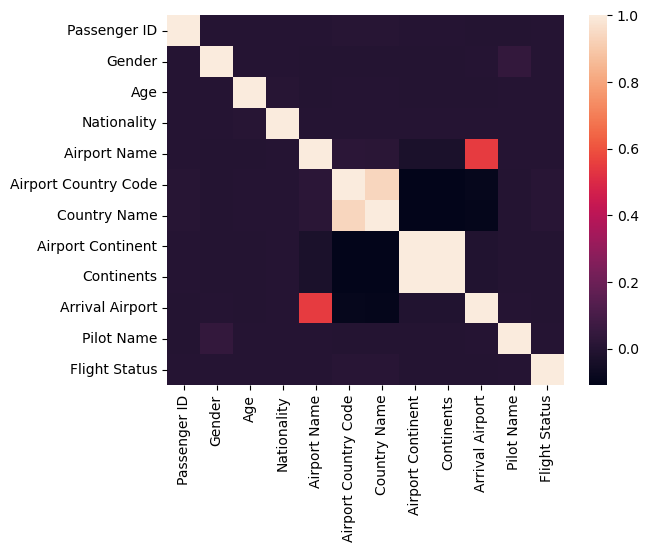

In [13]:
sns.heatmap(df.corr())

<Axes: xlabel='Flight Status', ylabel='count'>

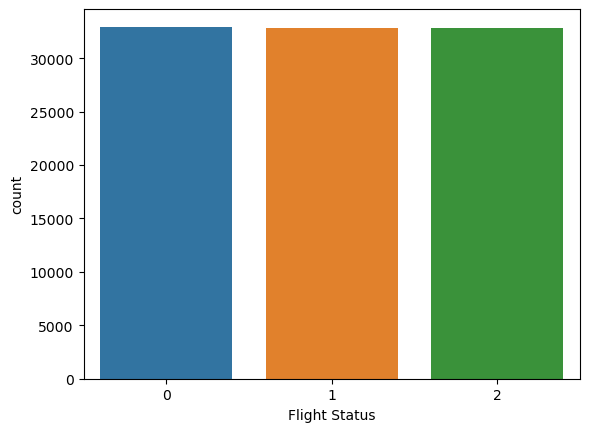

In [14]:
sns.countplot(x = 'Flight Status' , data = df)

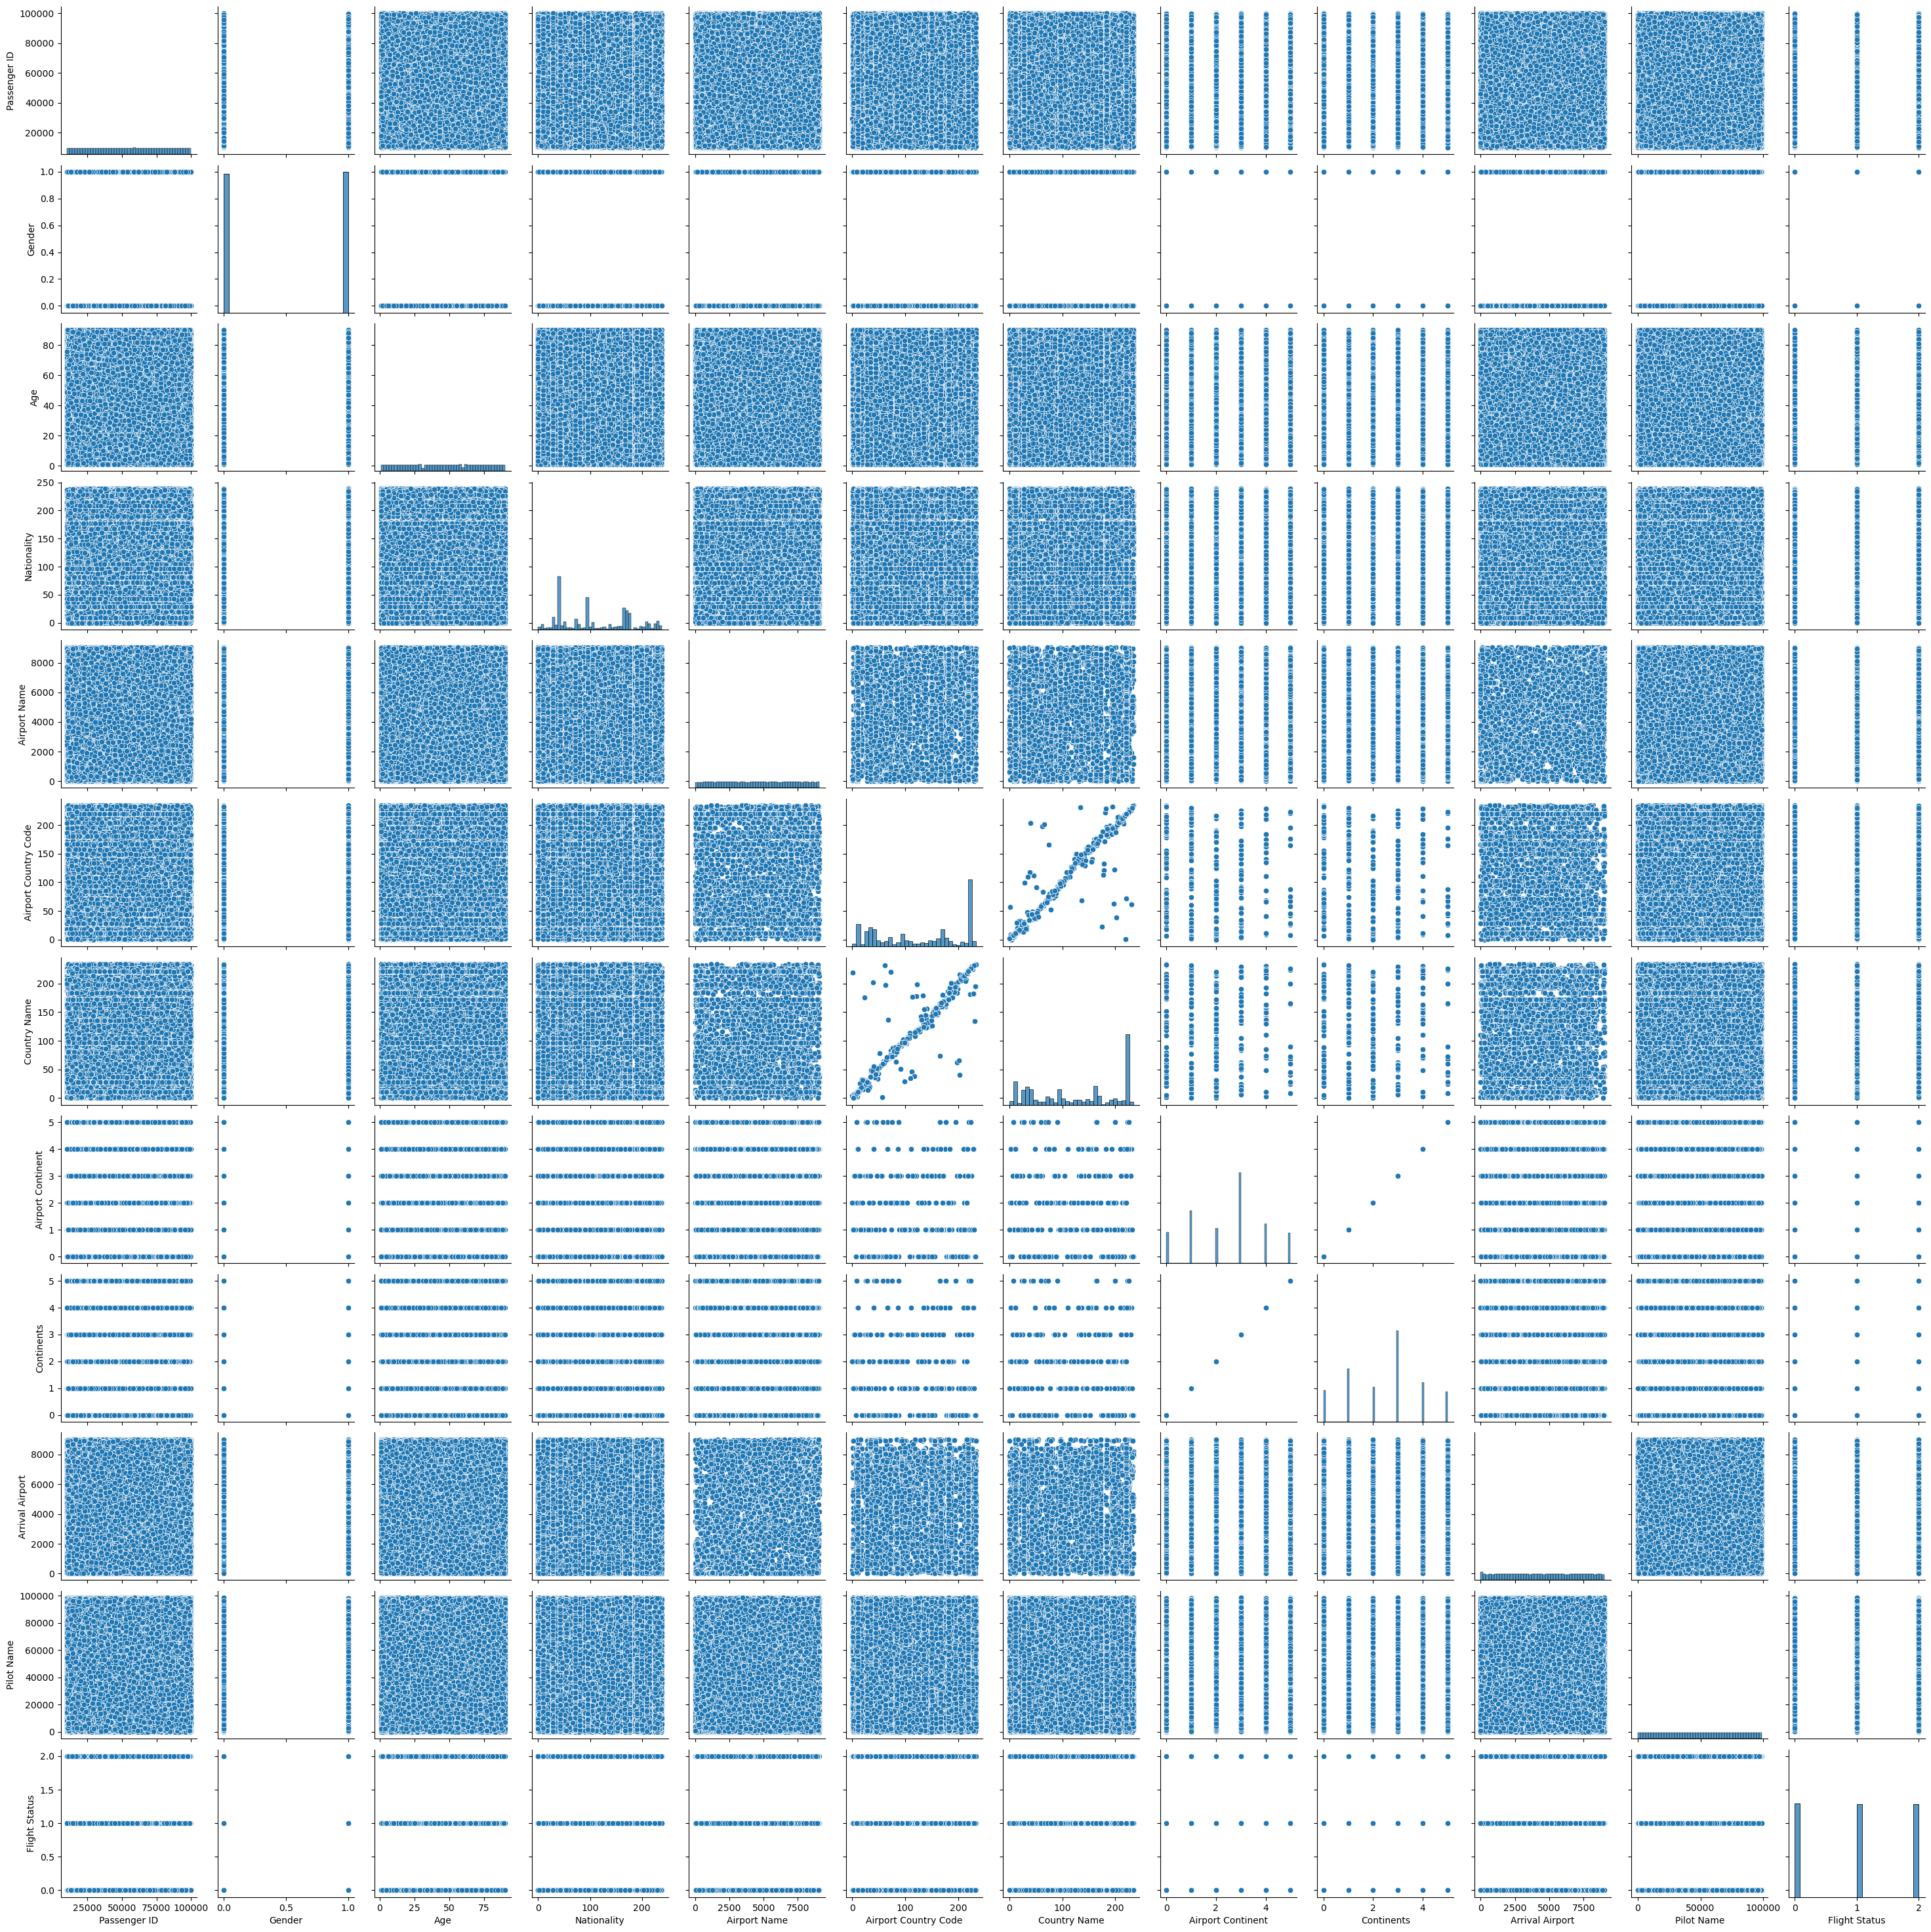

In [15]:
sns.pairplot(df)